In [1]:
suppressMessages(library(glue))
suppressMessages(library(tidyverse))
suppressMessages(library(data.table))


In [2]:
suppressMessages(library(cowplot))
theme_set(theme_cowplot())

In [3]:
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res=180)

In [4]:
if (getwd() != path.expand("~/cdai/SpliFi/analysis")) {
    setwd(path.expand("~/cdai/SpliFi/analysis"))
    # print 
    print(glue("Changed working directory to {getwd()}"))
}

Changed working directory to /project2/yangili1/cdai/SpliFi/analysis


In [5]:
gtex.meta <- fread("../code/resources/GTEx/juncs/sampid-smts-smtsd-subjid.tsv")

## Number of sub tissue category by tissue

Some tissues have more than 1 tissue types, e.g. Brain has 13 sub tissues. 

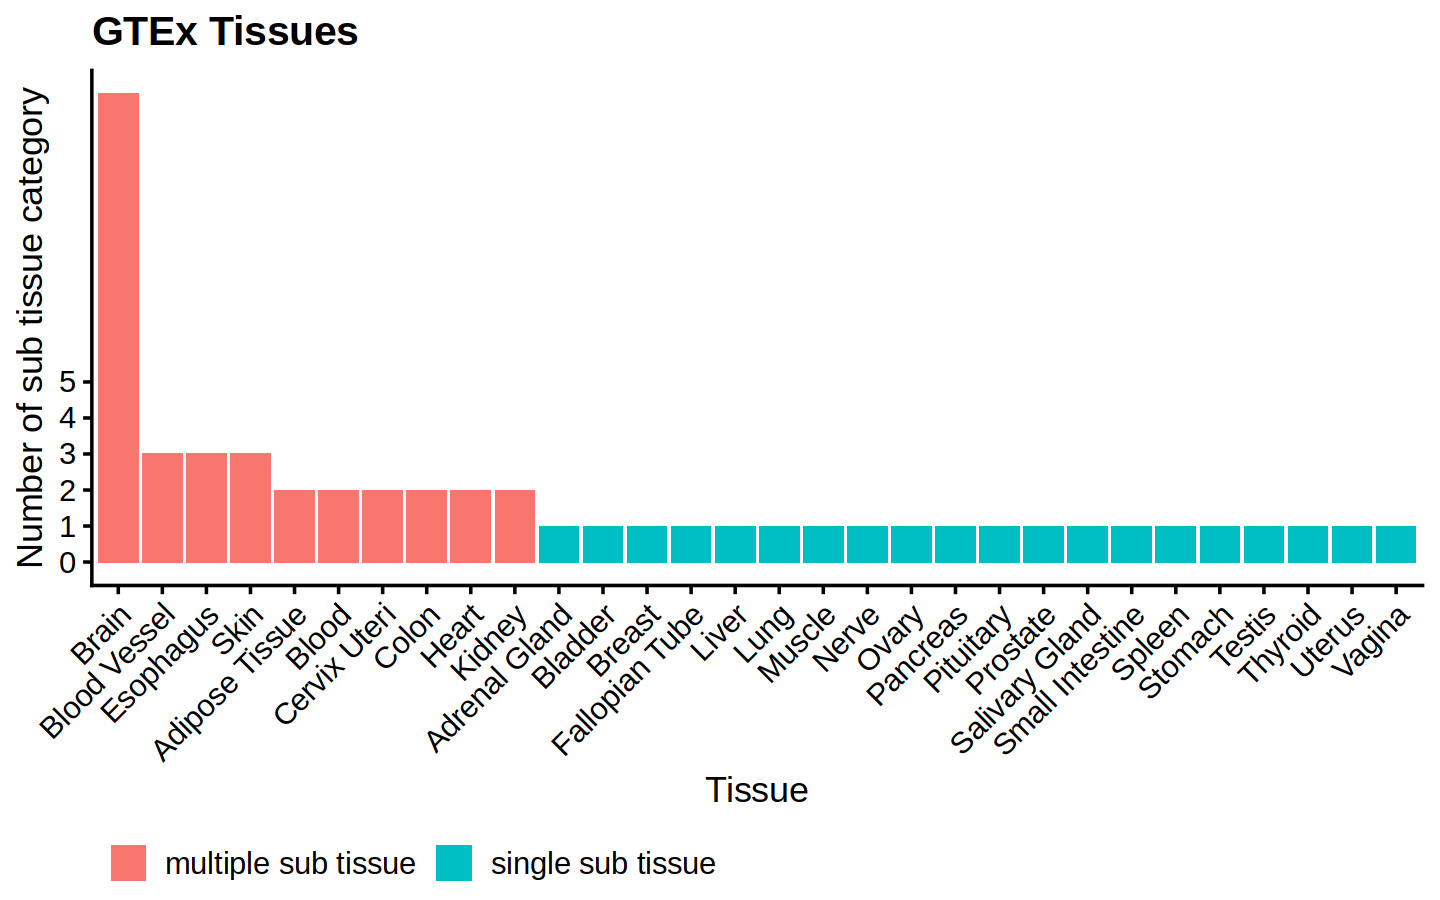

In [6]:
#| label: fig-gtex-sub-tissues
#| fig-cap: Number of sub tissue categories per tissue in GTEx
#| include: true

gtex.meta[, .(N = uniqueN(SMTSD)), by = SMTS] %>% 
    .[, .(SMTS, N, type = if_else(N > 1, "multiple sub tissue", "single sub tissue"))] %>%
    ggplot(aes(x = reorder(SMTS, -N), y = N, fill = type)) + geom_col() + 
        scale_y_continuous(breaks = seq(0, 5, 1)) +
        labs(x = "Tissue", y = "Number of sub tissue category", title = "GTEx Tissues",
             fill = NULL) +
        theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.position = "bottom")

## Number of subjects per tissue (sub tissue)



In [7]:
# number of unique subjects per tissue
dt1  <- gtex.meta[, .(N = uniqueN(SMTSD), SMTSD, SUBJID), by = SMTS] %>% 
    .[, .(SMTS,  SMTSD, SUBJID, type = if_else(N > 1, "multiple sub tissue", "single sub tissue"))] %>% 
    .[, .(N = uniqueN(SUBJID)), by = .(type, SMTS, SMTSD)]

In [8]:
#| label: tbl-single-sub-tissue-N_subjects
#| tbl-cap: "Number of unique subjects per tissue for single sub tissue categories"
#| include: true

dt1[type == "single sub tissue"][order(-N)]

type,SMTS,SMTSD,N
<chr>,<chr>,<chr>,<int>
single sub tissue,Muscle,Muscle - Skeletal,803
single sub tissue,Thyroid,Thyroid,653
single sub tissue,Nerve,Nerve - Tibial,619
single sub tissue,Lung,Lung,578
single sub tissue,Breast,Breast - Mammary Tissue,459
single sub tissue,Testis,Testis,361
single sub tissue,Stomach,Stomach,359
single sub tissue,Pancreas,Pancreas,328
single sub tissue,Pituitary,Pituitary,283


In [13]:
# select sub subject names with min sample > 80
dt1[type == "single sub tissue"][order(-N)][N > 80][, SMTSD] %>% 
str_remove_all(" ") %>% 
paste(sep="", collapse = ",")


[1] "Muscle-Skeletal,Thyroid,Nerve-Tibial,Lung,Breast-MammaryTissue,Testis,Stomach,Pancreas,Pituitary,AdrenalGland,Prostate,Spleen,Liver,SmallIntestine-TerminalIleum,Ovary,MinorSalivaryGland,Vagina,Uterus"

In [9]:
#| label: tbl-multi-sub-tissue-N_subjects
#| tbl-cap: "Number of unique subjects per tissue for multiple sub tissue categories"
#| include: true

dt1[type == "multiple sub tissue"][order(SMTS, -N)]

type,SMTS,SMTSD,N
<chr>,<chr>,<chr>,<int>
multiple sub tissue,Adipose Tissue,Adipose - Subcutaneous,663
multiple sub tissue,Adipose Tissue,Adipose - Visceral (Omentum),541
multiple sub tissue,Blood,Whole Blood,755
multiple sub tissue,Blood,Cells - EBV-transformed lymphocytes,174
multiple sub tissue,Blood Vessel,Artery - Tibial,663
multiple sub tissue,Blood Vessel,Artery - Aorta,432
multiple sub tissue,Blood Vessel,Artery - Coronary,240
multiple sub tissue,Brain,Brain - Cortex,255
multiple sub tissue,Brain,Brain - Caudate (basal ganglia),246


In [21]:
# subj with min samples > 20

dt1[type == "multiple sub tissue"][order(SMTS, -N)][N > 80][, SMTSD] %>% 
str_remove_all(" ") %>% 
paste(sep="", collapse = ",")

[1] "Adipose-Subcutaneous,Adipose-Visceral(Omentum),WholeBlood,Cells-EBV-transformedlymphocytes,Artery-Tibial,Artery-Aorta,Artery-Coronary,Brain-Cortex,Brain-Caudate(basalganglia),Brain-Nucleusaccumbens(basalganglia),Brain-Cerebellum,Brain-CerebellarHemisphere,Brain-FrontalCortex(BA9),Brain-Putamen(basalganglia),Brain-Hypothalamus,Brain-Hippocampus,Brain-Anteriorcingulatecortex(BA24),Brain-Spinalcord(cervicalc-1),Brain-Amygdala,Brain-Substantianigra,Colon-Transverse,Colon-Sigmoid,Esophagus-Mucosa,Esophagus-Muscularis,Esophagus-GastroesophagealJunction,Heart-LeftVentricle,Heart-AtrialAppendage,Kidney-Cortex,Skin-SunExposed(Lowerleg),Skin-NotSunExposed(Suprapubic),Cells-Culturedfibroblasts"

## Number of samples per individual

The number of samples per individual is not the same across tissues.

- single sub tissue: 1 sample per individual
- multiple sub tissues: 1 sample per sub tissue per individual

In [73]:
dt2 <- gtex.meta[, .(N = uniqueN(SMTSD), SMTSD, SUBJID, SAMPID), by = SMTS] %>% 
    .[, .(SMTS,  SMTSD, SUBJID, SAMPID, type = if_else(N > 1, "multiple sub tissue", "single sub tissue"))]

Table @tbl-single-sub-tissue-max-samp-per-subj shows that each subject within a certain sub tissue type have 1 sample. Thus it is safe to run leafcutter on subject ID per tissue type.

In [80]:
#| label: tbl-single-sub-tissue-max-samp-per-subj
#| tbl-cap: "Maximum number of samples per subject for single sub tissue type"
#| include: true

dt2[type == "single sub tissue"
][, .(N = uniqueN(SAMPID)), by = .(type, SMTS, SMTSD, SUBJID)
 ][, .(maxNSampPerSubj = max(N)), by = .(type, SMTS, SMTSD)]

type,SMTS,SMTSD,maxNSampPerSubj
<chr>,<chr>,<chr>,<int>
single sub tissue,Muscle,Muscle - Skeletal,1
single sub tissue,Uterus,Uterus,1
single sub tissue,Vagina,Vagina,1
single sub tissue,Breast,Breast - Mammary Tissue,1
single sub tissue,Salivary Gland,Minor Salivary Gland,1
single sub tissue,Adrenal Gland,Adrenal Gland,1
single sub tissue,Thyroid,Thyroid,1
single sub tissue,Lung,Lung,1
single sub tissue,Spleen,Spleen,1


For multi sub category tissue types, it is not safe to run leafcutter on subject ID per tissue type. Because multiple sub tissue category corresponds to the same individual. For example, subject `GTEX-1117F` has 1 sample in `Brain-Cerebellum` and 1 sample in `Brain-Cortex`, see @tbl-multi-sub-tissue-max-samp-per-subj-1 and @tbl-multi-sub-tissue-max-samp-per-subj-1. It is safe to run leafcutter on subject ID per sub tissue type though.

In [81]:
#| label: tbl-multi-sub-tissue-max-samp-per-subj-1
#| tbl-cap: "Maximum number of samples per subject for multiple sub tissue type"
#| include: true

# multple sub tissue type
dt2[type == "multiple sub tissue"
][, .(N = uniqueN(SAMPID)), by = .(type, SMTS, SMTSD, SUBJID)
 ][, .(maxNSampPerSubj = max(N)), by = .(type, SMTS, SMTSD)]

type,SMTS,SMTSD,maxNSampPerSubj
<chr>,<chr>,<chr>,<int>
multiple sub tissue,Adipose Tissue,Adipose - Subcutaneous,1
multiple sub tissue,Adipose Tissue,Adipose - Visceral (Omentum),1
multiple sub tissue,Blood Vessel,Artery - Tibial,1
multiple sub tissue,Blood Vessel,Artery - Coronary,1
multiple sub tissue,Blood Vessel,Artery - Aorta,1
multiple sub tissue,Heart,Heart - Atrial Appendage,1
multiple sub tissue,Heart,Heart - Left Ventricle,1
multiple sub tissue,Skin,Skin - Not Sun Exposed (Suprapubic),1
multiple sub tissue,Skin,Skin - Sun Exposed (Lower leg),1


In [83]:
#| label: tbl-multi-sub-tissue-max-samp-per-subj-2
#| tbl-cap: "Maximum number of samples per subject for multiple sub tissue type"
#| include: true

# multple sub tissue type
dt2[type == "multiple sub tissue"
][, .(N = uniqueN(SAMPID)), by = .(type, SMTS, SUBJID)
 ][, .(maxNSampPerSubj = max(N)), by = .(type, SMTS)]

type,SMTS,maxNSampPerSubj
<chr>,<chr>,<int>
multiple sub tissue,Adipose Tissue,2
multiple sub tissue,Blood Vessel,3
multiple sub tissue,Heart,2
multiple sub tissue,Skin,3
multiple sub tissue,Brain,13
multiple sub tissue,Esophagus,3
multiple sub tissue,Colon,2
multiple sub tissue,Blood,2
multiple sub tissue,Kidney,2


---

In [26]:
fname <- dir('../code/resources/GTEx/juncs/groupped_juncs', include.dirs = T)
fname  <- glue('../code/resources/GTEx/juncs/groupped_juncs/{fname}')

In [43]:
names(fname)  <- str_split(fname, "/") %>% map(~.x[[7]])


In [69]:
fname[1:2]

../code/resources/GTEx/juncs/groupped_juncs/Adipose-Subcutaneous
../code/resources/GTEx/juncs/groupped_juncs/Adipose-Visceral_Omentum_

In [68]:
nfiles

Adipose-Subcutaneous            Adipose-Visceral_Omentum_ 
                                 663                                  541 
                        AdrenalGland                         Artery-Aorta 
                                 258                                  432 
                     Artery-Coronary                        Artery-Tibial 
                                 240                                  663 
                             Bladder                       Brain-Amygdala 
                                  21                                  152 
 Brain-Anteriorcingulatecortex_BA24_          Brain-Caudate_basalganglia_ 
                                 176                                  246 
          Brain-CerebellarHemisphere                     Brain-Cerebellum 
                                 215                                  241 
                        Brain-Cortex             Brain-FrontalCortex_BA9_ 
                                 255                                  209 
                   Brain-Hippocampus                   Brain-Hypothalamus 
                                 197                                  202 
Brain-Nucleusaccumbens_basalganglia_          Brain-Putamen_basalganglia_ 
                                 246                                  205 
       Brain-Spinalcord_cervicalc-1_                Brain-Substantianigra 
                                 159                                  139 
                Breast-MammaryTissue            Cells-Culturedfibroblasts 
                                 459                                  504 
    Cells-EBV-transformedlymphocytes                        Colon-Sigmoid 
                                 174                                  373 
                    Colon-Transverse   Esophagus-GastroesophagealJunction 
                                 406                                  375 
                    Esophagus-Mucosa                 Esophagus-Muscularis 
                                 555                                  515 
               Heart-AtrialAppendage                  Heart-LeftVentricle 
                                 429                                  432 
                      Kidney-Medulla                                Liver 
                                   4                                  226 
                                Lung                   MinorSalivaryGland 
                                 578                                  162 
                     Muscle-Skeletal                         Nerve-Tibial 
                                 803                                  619 
                               Ovary                             Pancreas 
                                 180                                  328 
                           Pituitary                             Prostate 
                                 283                                  245 
      Skin-NotSunExposed_Suprapubic_            Skin-SunExposed_Lowerleg_ 
                                 604                                  701 
        SmallIntestine-TerminalIleum                               Spleen 
                                 187                                  241 
                             Stomach                               Testis 
                                 359                                  361 
                             Thyroid                               Uterus 
                                 653                                  142 
                              Vagina                           WholeBlood 
                                 156                                  755